### Import Libraries
Import TensorFlow for model building, NumPy for data handling, and Matplotlib for visualization.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data
Create a noisy quadratic dataset to simulate a non-linear regression task.


In [2]:
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

### Define Neural Network Model
Use TensorFlow's Sequential API to build a 3-layer feedforward neural network with ReLU activations.


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(1,)),  # Input layer with 5 neurons
    tf.keras.layers.Dense(5, activation='relu'),  # Hidden layer with 5 neurons
    tf.keras.layers.Dense(1)  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Show model architecture and parameters
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the Model
Set up the optimizer, loss function, and metrics for training using built-in TensorFlow functions.


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae', 'mape'])


### Train the Model with Custom Callback
Train the model for 1000 epochs and use a custom callback to print loss every 100 epochs.


In [9]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 100 == 0:  # Print loss every 100 epochs
            print(f"Epoch {epoch}: Loss = {logs.get('loss')}")

history = model.fit(X, y, epochs=1000, verbose=0, callbacks=[LossHistory()])

Epoch 0: Loss = 0.09176637977361679
Epoch 100: Loss = 0.09140539914369583
Epoch 200: Loss = 0.0917331725358963
Epoch 300: Loss = 0.09279049187898636
Epoch 400: Loss = 0.09159275889396667
Epoch 500: Loss = 0.09165273606777191
Epoch 600: Loss = 0.09158989042043686
Epoch 700: Loss = 0.0918787270784378
Epoch 800: Loss = 0.09168613702058792
Epoch 900: Loss = 0.09155702590942383


### Visualize Training Loss
Plot the loss values across epochs to evaluate the training progress.


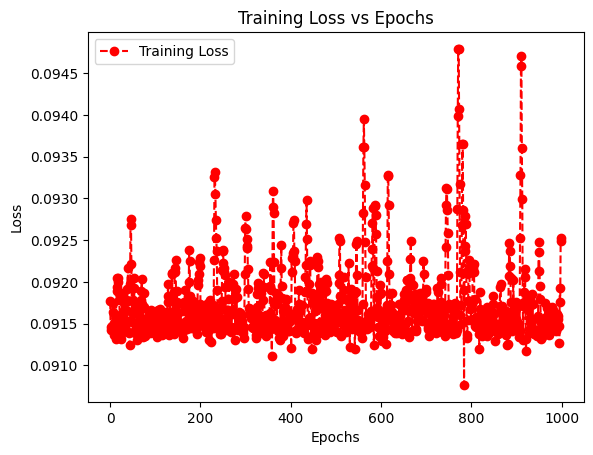

In [10]:
plt.plot(history.history['loss'], label="Training Loss", color='red', linestyle='--', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

### Predict and Compare with Actual Data
Generate predictions and compare them to true labels using a scatter plot and line graph.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


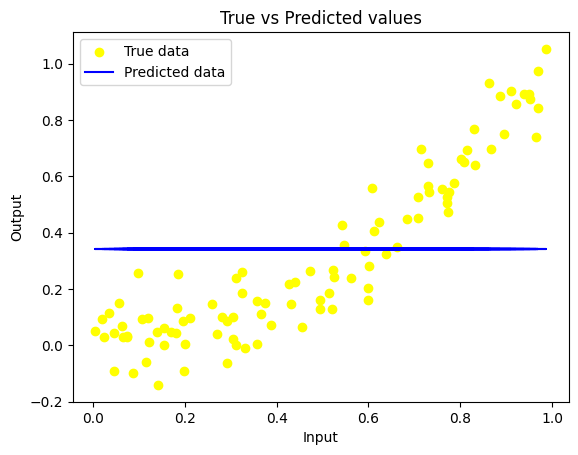

In [11]:
# Make predictions
y_pred = model.predict(X)

# Plot true vs predicted values
plt.scatter(X, y, color='yellow', label='True data')
plt.plot(X, y_pred, color='blue', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

### Plot Training and Validation Loss
Display training and validation loss over epochs if validation data was used during training.


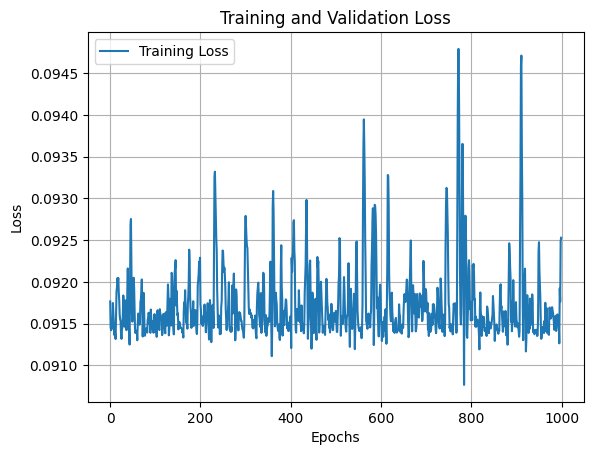

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
